In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import pandas as pd

root = "/home/ki/projects/work/mchad/logs/multiruns/many/06/24/22-18:31:15/cifar10/"

dfs = []

values = {}

methods =  [ "mchad", "cac", "center", "ii"]

for method in methods:
    values[method] = []

    for i in range(99):
        path = f"{root}/{method}/{i}/results.csv"
        df = pd.read_csv(path)

        value = df["Distance/OOD/AUROC/test"].mean()
        values[method].append(value)

In [19]:
values = {k: np.array(v) for k, v in values.items()}

In [20]:
from collections import Counter
n_samples = 1
mc_iter = 10000

results = []

for n_samples in range(1, 99):
    winning = []

    for i in range(mc_iter):
        tmp = {}

        for method in methods:
            v = np.random.permutation(values[method])[:n_samples].mean()
            # print(v)
            tmp[method] = v

        # print(res)
        winning.append(max(tmp, key=tmp.get))

    c = Counter(winning)
    for method in methods:
        v = c[method]
        results.append({"Method": method, "Win Probability": v / mc_iter, "Number of Seed Replicates": n_samples})

In [21]:
data = pd.DataFrame(results)


In [22]:
data

,Method,Win Probability,Number of Seed Replicates
0,mchad,0.6385,1
1,cac,0.2515,1
2,center,0.1100,1
3,ii,0.0000,1
4,mchad,0.6779,2
...,...,...,...
387,ii,0.0000,97
388,mchad,1.0000,98
389,cac,0.0000,98
390,center,0.0000,98


In [23]:
name_map = {"cac": "CAC",
            "mchad": "MCHAD",
            "center": "Center",
            "gcac": "G-CAC",
            "gmchad": "G-MCHAD",
            "gcenter": "G-Center",
            "ii": "II"}

data["Method"] = data["Method"].apply(name_map.get)

In [24]:
data


,Method,Win Probability,Number of Seed Replicates
0,MCHAD,0.6385,1
1,CAC,0.2515,1
2,Center,0.1100,1
3,II,0.0000,1
4,MCHAD,0.6779,2
...,...,...,...
387,II,0.0000,97
388,MCHAD,1.0000,98
389,CAC,0.0000,98
390,Center,0.0000,98


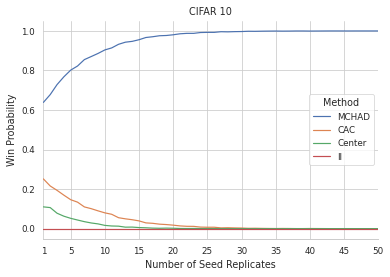

In [30]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")


g = sb.lineplot(data=data, x="Number of Seed Replicates", y="Win Probability", hue="Method")
sb.despine(top=True, left=True, right=True)
ticks = [1] + list(range(0, 51, 5))
_ = g.set(xticks=ticks)
g.set_xlim([1, 50])
plt.title("CIFAR 10")
plt.savefig("out/trials.png", dpi=300)